In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
trips = pd.read_csv('tp_bike/trip.csv')

In [19]:
trips.head(3)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214


In [20]:
trips.dtypes

id                     int64
duration               int64
start_date            object
start_station_name    object
start_station_id       int64
end_date              object
end_station_name      object
end_station_id         int64
bike_id                int64
subscription_type     object
zip_code              object
dtype: object

In [21]:
#Depuracion de datos
#separo las fechas de las horas
fechaYhora = trips['start_date'].str.split(' ')

In [22]:
fecha = fechaYhora.map(lambda x: x[0])
hora = fechaYhora.map(lambda x: x[1])

In [23]:
trips = trips.assign(date_start = fecha, time_start = hora)

In [24]:
#IDEM pero con la fecha final
fechaYhora = trips['end_date'].str.split(' ')
fecha = fechaYhora.map(lambda x: x[0])
hora = fechaYhora.map(lambda x: x[1])
trips = trips.assign(date_end = fecha, time_end = hora)

In [25]:
#elimino columnas
del trips['start_date']
del trips['end_date']

In [26]:
#le cambio el formato a las fechas
import calendar
trips['date_start'] = pd.to_datetime(trips['date_start'])
trips['date_end'] = pd.to_datetime(trips['date_end'])

In [27]:
trips.head(3)

,id,duration,start_station_name,start_station_id,end_station_name,end_station_id,bike_id,subscription_type,zip_code,date_start,time_start,date_end,time_end
0,4576,63,South Van Ness at Market,66,South Van Ness at Market,66,520,Subscriber,94127,2013-08-29,14:13,2013-08-29,14:14
1,4607,70,San Jose City Hall,10,San Jose City Hall,10,661,Subscriber,95138,2013-08-29,14:42,2013-08-29,14:43
2,4130,71,Mountain View City Hall,27,Mountain View City Hall,27,48,Subscriber,97214,2013-08-29,10:16,2013-08-29,10:17


In [28]:
trips['weekday'] = trips['date_start'].map(lambda x: x.weekday_name)

In [29]:
trips['hour'] = pd.to_datetime(train['time_start'], format = '%H:%M', errors = 'coerce').dt.hour

In [30]:
trips.dtypes

id                             int64
duration                       int64
start_station_name            object
start_station_id               int64
end_station_name              object
end_station_id                 int64
bike_id                        int64
subscription_type             object
zip_code                      object
date_start            datetime64[ns]
time_start                    object
date_end              datetime64[ns]
time_end                      object
weekday                       object
hour                         float64
dtype: object

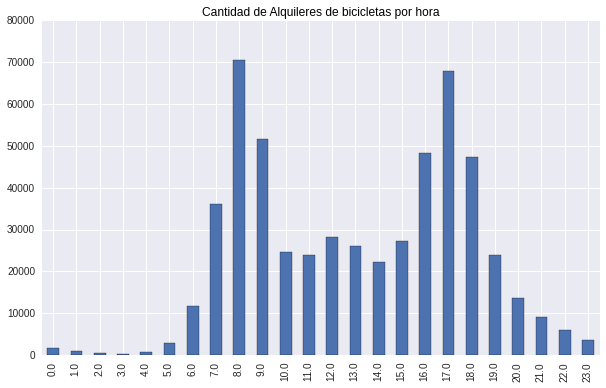

In [32]:
#Pregunta : Plots sobre la Cantidad de alquileres por hora
plt.figure()
plt.title('Cantidad de Alquileres de bicicletas por hora', color = 'black')
trips['hour'].value_counts().sort_index().plot(kind = 'bar', figsize = (10,6));

In [17]:
#Pregunta: cantidad de alquileres por dia
#plt.figure()
#plt.title('Cantidad de Alquileres de bicicletas por dia', color = 'black')
#trips['weekday'].value_counts()\
#        .reindex([1,5,6,7,0,2,3 ] + range(3, len(train)))\
#        .plot(kind = 'bar', figsize = (10,6));